# k4me1 signal in peaks processing

Pipeline for the input files:
* Remove duplicates from BAM files
* Build sorted BDG files
* Launch the following to get signal in peaks
```
cd k4me1_20vs20_reseq_bams_unique_bws
CMD=""
for F in $(ls *.bdg | grep -v input | grep -v YD14); do 
    NAME=${F%%_R1*}; 
    CMD="$CMD $NAME $F"; 
done
python ~/work/washu/analysis/peaks_signal.py --regions ../k4me1_20vs20_reseq_bams_peaks_union/YO_macs_broad_0.1.bed --out output --bedgraphs $CMD
```

In [1]:
import argparse
import os
import pandas as pd
import numpy as np
from bed.bedtrace import run, Bed

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

def signal_pca(signal, title):
    pca = PCA(n_components=2)
    signal_r = pca.fit(signal).transform(signal)
    print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

    ODS=np.asarray([n.startswith('OD') for n in signal.index])
    YDS=np.asarray([n.startswith('YD') for n in signal.index])

    plt.figure()
    plt.scatter(signal_r[YDS, 0], signal_r[YDS, 1] , color='red', alpha=.8, label='YD')
    plt.scatter(signal_r[ODS, 0], signal_r[ODS, 1] , color='blue', alpha=.8, label='OD')
    plt.title(title)
    plt.show()
    print('\n'.join([str(t) for t in zip(signal.index, signal_r)]))

explained variance ratio: [ 0.6690533   0.13666314]


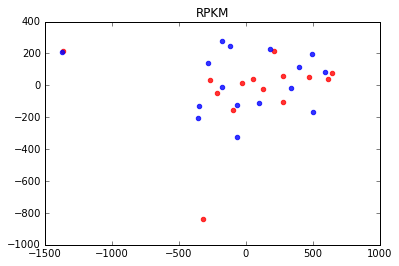

('OD11', array([-175.91740438,  278.31132249]))
('OD12', array([ -66.22424151, -120.46012235]))
('OD13', array([ 495.63038725,  199.06382251]))
('OD14', array([-117.10950527,  246.05096762]))
('OD15', array([ 180.2756628 ,  229.76965936]))
('OD16', array([-1373.90568487,   210.322131  ]))
('OD17', array([-355.26489286, -202.69582564]))
('OD18', array([ 591.43675136,   81.59227682]))
('OD19', array([-177.70583885,  -10.37857318]))
('OD20', array([ 392.837316  ,  116.45156655]))
('OD4', array([-281.68322767,  138.76248252]))
('OD5', array([ -70.48386068, -326.5286116 ]))
('OD6', array([ 335.12024662,  -19.4815342 ]))
('OD7', array([  97.70756913, -110.66392939]))
('OD8', array([ 501.10351101, -165.22988386]))
('OD9', array([-348.9356387 , -127.32418748]))
('YD10', array([-321.27075358, -839.45299303]))
('YD11', array([ 613.70383513,   39.24198274]))
('YD12', array([ 128.25951427,  -21.32139022]))
('YD15', array([ -96.74510914, -153.38326397]))
('YD16', array([ 472.49841728,   53.66258712

In [62]:
FOLDER = '/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/k4me1/k4me1_peaks_signal/'
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_rpkm.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD10'], axis=1).transpose()
signal_pca(signal, 'RPKM')

explained variance ratio: [ 0.93388025  0.0304574 ]


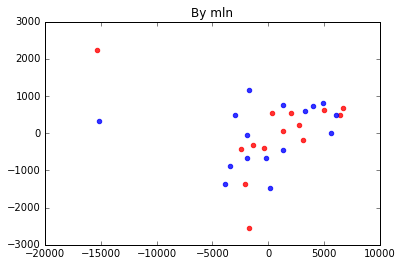

('OD11', array([-1871.25543234,   -56.12713444]))
('OD12', array([-193.59591998, -677.82942972]))
('OD13', array([ 4944.09918017,   804.45100883]))
('OD14', array([-1703.32260055,  1161.15215565]))
('OD15', array([ 1351.41432582,   763.29399545]))
('OD16', array([-15127.25480281,    332.35116556]))
('OD17', array([-3842.56512686, -1366.25377346]))
('OD18', array([ 6055.69851962,   490.4529314 ]))
('OD19', array([-1945.12672539,  -654.17651464]))
('OD20', array([ 4016.16532225,   722.68104392]))
('OD4', array([-2999.20090728,   478.86239107]))
('OD5', array([  169.34834618, -1464.44942765]))
('OD6', array([ 3335.56856306,   589.92373613]))
('OD7', array([ 1314.94158607,  -455.36879807]))
('OD8', array([  5.62010132e+03,  -4.15227420e+00]))
('OD9', array([-3432.77609299,  -886.98001315]))
('YD10', array([-1715.33460505, -2546.3500692 ]))
('YD11', array([ 6397.75779567,   498.64016534]))
('YD12', array([ 1339.20756956,    70.17689964]))
('YD15', array([-1362.92229852,  -315.90368599]))
('

In [63]:
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_by_mln.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD10'], axis=1).transpose()
signal_pca(signal, 'By mln')

explained variance ratio: [ 0.93388025  0.0304574 ]


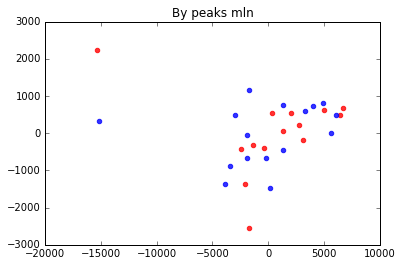

('OD11', array([-1871.25543234,   -56.12713444]))
('OD12', array([-193.59591998, -677.82942972]))
('OD13', array([ 4944.09918017,   804.45100883]))
('OD14', array([-1703.32260055,  1161.15215565]))
('OD15', array([ 1351.41432582,   763.29399545]))
('OD16', array([-15127.25480281,    332.35116556]))
('OD17', array([-3842.56512686, -1366.25377346]))
('OD18', array([ 6055.69851962,   490.4529314 ]))
('OD19', array([-1945.12672539,  -654.17651464]))
('OD20', array([ 4016.16532225,   722.68104392]))
('OD4', array([-2999.20090728,   478.86239107]))
('OD5', array([  169.34834618, -1464.44942765]))
('OD6', array([ 3335.56856306,   589.92373613]))
('OD7', array([ 1314.94158607,  -455.36879807]))
('OD8', array([  5.62010132e+03,  -4.15227420e+00]))
('OD9', array([-3432.77609299,  -886.98001315]))
('YD10', array([-1715.33460505, -2546.3500692 ]))
('YD11', array([ 6397.75779567,   498.64016534]))
('YD12', array([ 1339.20756956,    70.17689964]))
('YD15', array([-1362.92229852,  -315.90368599]))
('

In [64]:
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_by_mln.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD10'], axis=1).transpose()
signal_pca(signal, 'By peaks mln')

explained variance ratio: [ 0.93588404  0.02617375]


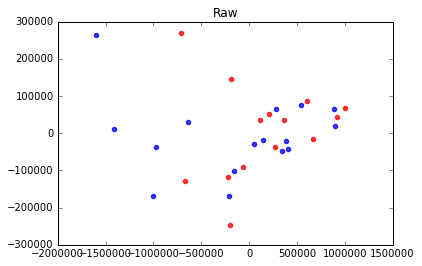

('OD11', array([-1005420.41859019,  -169119.7080173 ]))
('OD12', array([-162732.41409232, -101193.67007841]))
('OD13', array([ 143314.38570618,  -17738.48363356]))
('OD14', array([-1598003.69502081,   264695.76588204]))
('OD15', array([-970309.45529445,  -35996.25297075]))
('OD16', array([-1416814.67090926,    12220.25090867]))
('OD17', array([ 406869.16800146,  -41825.32883668]))
('OD18', array([ 901751.61750773,   20330.83312494]))
('OD19', array([-208674.07452094, -169067.2308515 ]))
('OD20', array([ 281725.20467689,   66037.52836903]))
('OD4', array([-642442.23397051,   31195.12670836]))
('OD5', array([ 382363.30902117,  -21150.77144316]))
('OD6', array([ 541231.06932474,   75652.28774449]))
('OD7', array([ 338885.74399858,  -48007.20473314]))
('OD8', array([ 882246.32336134,   64642.73313762]))
('OD9', array([ 46107.91130161, -29260.06939622]))
('YD10', array([ 664564.91760409,  -15112.61959392]))
('YD11', array([ 997558.0073725 ,   67816.70292511]))
('YD12', array([ 206871.190620

In [65]:
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_raw.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD10'], axis=1).transpose()
signal_pca(signal, 'Raw')